In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
from data_generators import get_train_test_sorting
from data_generators import get_train_test_addition_2
from training import *

-----
# TMA4320 vår 2024 - Prosjekt i industriell matematikk
I løpet av de siste årene har påvirkningen til KI på samfunnet økt enormt. En av de mest åpenlyse effektene synlig til hverdagsmenneske er tilgangen til deep learning språkmodeller som ChatGPT og Gemeni. Dette er enormt komplekse programmer som består av utallige ulike enklere prosesser og funksjoner, derav opprinnelsen til navnet deep learning. 

Målet for dette prosjektet er å bedre forstå språkmodeler og deep learning ved å programmere et eget nevralt nettverk. Til dette formålet skal transformermodellen forståes og implementeres. Samt ytterlig koding av de ulike funksjonene det nevrale nettverket består av. Etter koden er riktig implementert skal programmet gjennomgå en læringsprosess ved å trenes på et datasett før det kan brukes til det gitte formålet. Koden skal skrives i Python med fokus på objektorientert programmering.

--------------
## Oppgave 1 - Forstå hvordan datasettene og transformermodellen er strukturert

##### 1.1 Gi et eksempel (som i likning $(10)$) på hvordan et datasett ${x, y}$ ville sett ut for å trene en transformermodell for å predikere et heltall $d$ gitt $d = a · b + c$ der $a, c$ er tosifrede heltall, mens $b$ er et ettsifret heltall, altså $9 ≥ b ∈ Z$.

Et sett av treningsdata kan genereres ved å la $x$ bestå av sifrene i $a, b, c$ og alle sifrene i $d$ med unntak av det siste og lar $y = d$. Dermed vil formen for $x$ være gitt ved $x = [a_0 , \cdot \cdot \cdot, a_{r-1}, b_0, \cdot \cdot \cdot, b_{r-1}, c_0, \cdot \cdot \cdot, c_{r-1}, d_0, \cdot \cdot \cdot, d_{r-1}]$. Gitt betingelsene i oppgaven over, la $r$ = 2, $a$ = 24, $b$ = 4, $c$ = 15 og dermed <br> $d$ = 111.  som gir oss x = $[2, 4, 4, 1, 5, 1, 1]$ og $y = [1, 1, 1]$. Merk at siste siffer i $d$ ikke er del av datasettet i $x$.  Modellen skal da gi $\hat{z}$. Lengden av $\hat{z}$, $n$, vil være gitt av lengden av $x$ som har med lengden $n$. $\hat{z}$ = [$\hat{z}_0$, \cdot \cdot \cdot, $\hat{z}_5$] =  $f_{\theta}([2, 4, 4, 1, 5, 1, 1])$. Ideelt er $\theta$ optimert til en slik grad at <Br> $\hat{y} = [\hat{z}_3, \hat{z}_4, \hat{z}_5] = [1, 1, 1] = y$ er korrekt predikert.

-----------------------------------------------------------------------------------------
##### 1.2) Når optimeringen er ferdig, hvordan kan vi bruke modellen $f_{\theta}$  til å predikere $d$ gitt $a, b, c$? Vis dette med et eksempel, på samme måte som i likning $(11)$.

Gitt at optmeringen er ferdig, kan modellen korrekt predikere $d$. Denne prossesen av å predikere de neste sifferene i seqvensen gjøres fra å lære av de oppgitte datasettene. Følgende tabell viser hvordan dette fungerer. La verdiene være det samme som i forrige oppgave, $r = 2, a = 24, b = 4,$<Br> $c = 15$

| Iterasjoner | Modell |
|----------|----------|
| $x^{(0)} = [2, 4, 0, 4, 1, 5]$ | $[\hat{z}_0^{(0)}, \hat{z}_1^{(0)}, \hat{z}_2^{(0)}, \hat{z}_3^{(0)}] = f_{\theta}(x^{(0)})$|
| $x^{(1)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}]$ | $[\hat{z}_0^{(1)}, \cdot \cdot \cdot, \hat{z}_4^{(1)}] = f_{\theta}(x^{(1)})$ |
| $x^{(2)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}]$ | $[\hat{z}_0^{(2)}, \cdot \cdot \cdot, \hat{z}_5^{(2)}] = f_{\theta}(x^{(2)})$  |
| $x^{(3)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ |  |

Disse predikasjonene hentes ut og returneres som $\hat{y} = [\hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ som bør være likt $y$.

-----------------------------------------------------------------------------------------
##### 1.3) Anta at vi bruker cross-entropy som objektfunksjon, at $m = 5$ og $y = [4, 3, 2, 1]$. Hvilke diskret sannsynlighetsfordeling $\hat{Y}$ ville gitt en objektfunksjon $L(θ, D) = 0$? Hva ville $\hat{y}$ vært i dette tilfellet?

Cross entropy er gitt ved $L(θ, D) = -\frac{1}{D \cdot n} \sum_{i=0}^{D-1} \sum_{j=0}^{n-1} \log \hat{Y}_{k,j}^{(i)}$ hvor $D$ er datapunktene, $\theta $
er parameterne, og $\hat{Y}$ er sannsynlighetsfordelingen til den predikterte modellen, samt er $j$ og $i$ dimensjonene til $\hat{Y}$. Det objektfunksjonen gjør er å sammenligne onehot(y) med $\hat{Y}$. Hvis $L(θ, D) = 0$ vil den optimerte modellen og onehot(y) være identiske. Når dette inntreffer vil $argmax_{\text{col}}(\hat{Y})$ = $\hat{y}$ som igjen er lik $y$. I dette tilfellet er $y = [4,3,2,1]$, som også vil være lik $\hat{y}$.
$\hat{Y}$ vil være gitt av den diskrete sannsynlighetsfordelingen:<Br><Br> $\hat{Y}$ =
$\left[\begin{array}{ccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{array}\right]$ , <Br><Br> som er lik onehot($[4,3,2,1]$). Dette betyr i praksis at paramtetrene i transformenmodellen klarer å prediktere hva som kommer videre i sekvensen og vi ender opp med samme antatt løsning ($\hat{y}$) som faktisk løsning.




-----------------------------------------------------------------------------------------
##### 1.4) Gitt $d, m, n_{max}, k, p$ og $L$. Hvor mange enkeltparametre har en transformermodell? Med enkeltparametre mener vi hvor mange tall $w ∈ R$ vi må bestemme ved optimering. En matrise $W ∈ R^{m×n}$ består av $m · n$ tall eller enkeltparametre.

Med gitte variabler for $d, m, n_{max}, k, p$ og  $L$ er antall enkeltparametre mulig å bestemme. Enkeltparametre er gitt med $w \in \mathbb{R}$ noe som uttrykkes med å se på dimensjoner for ulike parametermatriser i transformermodellen.

$W_E$ og $W_P$ har henholdsvis dimensjonene $W_E \in \mathbb{R}^{d \times m}$ og $ W_P \in \mathbb{R}^{d \times n_{max}} $ som representerer parametermatrisen til en sekvens for x med lengde n, som skrives som $z_0$. I tilegg ønskes det å gjøre $L$ paramtriserte trasformasjoner på $z_0$, så man ender opp med $L \cdot (d \times m + d \times n_{max})$ for embedding delen av enkeltparamtrene. Under unenbeddingen oppstår en ny parametermatrise $W_U$ som er en sekvens med lengde $n$ med heltall opp til $m$, den har dimensjonene $ W_U \in \mathbb{R}^{d \times m} $. Attention-lag bidrar også til antall enkeltparamtre for transformmodellen, der har man 4 parametermatriser; $W_O, W_V, W_Q, W_K$ alle med samme dimensjon $\mathbb{R}^{k \times d} $. Transformermodellen har også en $feed$-$forward $ del som bidrar med to paramtermatriser $W_1$ og $W_2$ begge med dimensjoner $\mathbb{R}^{p \times d} $


Hvis man tar disse parametermatrisene i betrakning og antar at $k < d < p$ vil man ha: 
$w = d \times m+L\cdot (d \times m + d \times n_{max}) + 4 \cdot k \times d + 2 \cdot p \times d $, enkeltparametre. (siden k og p er heltall man bestemmer selv er dette en rimelig antagelse å ta).


-----------------------------------------------------------------------------------------
##### 1.5 Transformermodellen er gitt i likningene $(4) - (9)$. La $n = n_{max} = 1,$  $m = d = k = p=2$ og $L=1$. Anta videre at $W_O = W_V = W_Q = W_K = W_1 = W_2 = W_U = I_{2×2}$ og at $σ(x) = Relu(x) = max(0, x)$. Dersom <Br> $W_E = \left[\begin{array}{ccc} 1 & 0 \\ 0 & \alpha \end{array} \right]$ , og $W_P$ = $\left[\begin{array}{ccc} 1 \\ 0 \end{array} \right]$ vis at vi må ha $\alpha > 1$ for å få  $\hat{z} = [1]$ som output når input er $x = [1]$.
*  *  *  * * * * * * * * * * * * * *

Med variablene oppgitt i oppgaven $L=n = n_{max}= x = 1$ og $m=d=k=p=d = 2$ og alle parametermatrisene lik

$\left[\begin{array}{ccc}
1 & 0 \\
0 & 1 
\end{array}\right]$ = $ I_{2\times 2}$ , utenom $W_E = \left[\begin{array}{ccc}
1 & 0 \\
0 & \alpha
\end{array}\right]$ , og $W_P = \left[\begin{array}{ccc}
1 \\
0 
\end{array}\right]$

Med dette oppgitt vil  $ X = onehot(x) = \left[\begin{array}{ccc}0 \\1 
\end{array}\right]$ som resulterer i en $z_0 = \left[\begin{array}{ccc}0 \\ \alpha 
\end{array}\right]+ \left[\begin{array}{ccc}1 \\ 0 
\end{array}\right]$ =$\left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$. For å videre bestemme et uttrykk for $\hat{z}$ må vi se på hva transformermodellen gjør med $z_0$. 

Videre er $z_{1/2}$ = $z_0 + W_O^T  W_V  z_0 A(z_0)$, hvor $A(z_0)$ = $softmax_{col}(z_0^T W_Q^T W_K z_0+D)$ og D sørger for at den strengt nedre delen av A er 0.
Ved å løse $A(z_0)$ får man utrykket $(1+ \alpha ^2)$ i softmax funksjonen.

$z_{1/2} = \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] + I_{2 \times 2} I_{2 \times 2} \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] softmax(1+ \alpha ^2)$ = $ 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$ ettersom softmax av et utrykk tilsvarer å dele på seg selv i e-potens, som resulterer at utrykket blir lik 1.

for $z_1$ får vi et uttrykk som er $z_{1/2} + W_2^T \sigma (W_1 z_{1/2})$, $\sigma$ er en aktiveringsfunskjon, i dette tilfelle kan man bruke $relu(W_1 z_{1/2})$.
Utrykket blir da:

$z_1 = 2  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]+ I_{2 \times 2} max(0,I_{2 \times 2} 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]) $ = $ 4  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$
 
Ved hjelp av $z_1$ kan man ta i bruk likning $(8)$ for å finne sannsynlighetsfunksjonen $Z$.

 $Z = softmax_{col}(W_U^T Z_1)$ $,$ her vil argumentet $W_U^T z_1$ bli lik $z_1$, og softmax vil returnere $Z = \frac{1}{e^4 + e^{4 \alpha}} \left[\begin{array}{ccc}e^4 \\ e^{4 \alpha }
\end{array}\right]$

for å få $\hat{z} = [1]$ må $argmax(Z)$ bli 1, og dette krever at verdien på indeks [1] må være større enn den på indeks [0], da må $e^4 < e^{4 \alpha}$ og dette impliserer at $\alpha >1$ 


---------------------------------------------------------------------------------
## Oppgave 2 - Objektorientert programmering for transformermodell

##### 2.1 I den utdelte koden layers.py og neural network.py finnes en objektorientert implementering av et nevralt nettverk som kan ha lineære lag og en Relu- aktiveringsfunksjon. I tillegg er embedding og posisjonsenkoding samt feed-forward lag implementert.<Br> Forklar hvordan NeuralNetwork bruker arv, eller inheritance, for å utføre en iterasjon av gradient descent (stepgd()) hvis vi antar det er initiert med minst ett LinearLayer i listen layers.

Et nevralt nettverk lærer gjennom mange små gradevis forbedringer gjort gjennom å prøve og feile. Denne prossen består av mange ulike funksjoner og operasjoner, som beskrevet i forrige oppgave. Dette gjøres med formålet om å utføre en gradient descent. Før at det nevralenettverket skal fungere må layers initieres.
 
Layers er en klasse som fungerer som en base klasse for alle andre typer layers i nettverket, som representerer de ulike prosessene det nevrale nettverket utfører. Her implementeres en basis versjon av metodene forward(), backward() og step_gd(). Dette vil si at hvis et objekt arver fra Layers klassen så vil det objektet har metodene forward(), backward() og step_gd(). Derved vil alle layers som arver fra Layers base klassen implementere eller overskrive disse metodene med kode tilrettelagt hvert individuelle layer. Denne strukturen tillater også at et lag har en egen spesifiserte step_gd() med at det kan overskrive metoden til å være mest hensiktsmessig for det spesifikke laget. Resultatet av dette gjør at neural_network kan operere på et høyere abstraksjonsnivå og kan implementere "universelle" metoder som step_gd() uten å ta hensyn til de ulike spesifikke detaljene til hvert lag. 

Mer spesifikt bruker neural_network arv til å kunne behandle alle sine layers på samme måte, selv om de kan ha forskjellig implementerte step_gd() metoder. Polymorfisme lar da neural_network kalle samme funksjon (step_gd()) på samme måte for hvert lag uten å vite hvilken subklasse hvert layer tilhører. Dermed kan hver operasjon som nural_network utfører kalles gjennom bruk av forward(), for å finne objekt funksjonen, backwards(), for å resette og oppdatere verdiene i nettverket, og step_gd() for å optimalisere vektingen og biasene i treningen av nettverket.

------
## Oppgave 3 - Opptrening av en transformermodell for å løse sorterings- og addisjonsproblemet.

##### 3.3 Implementer en funksjon som sorterer en sekvens a, på samme måte som kapittel 3.1.2 og rapporter hvor stor andel av disse sekvensene du klarte å sortere riktig. Hvis du regner ut hvor mange mulige sekvenser av lengde r = 5 med 0 og 1 det er mulig å generere, ser du kanskje at det er umulig å teste på nye sekvenser.

Før et nevralt nettverk kan returnere korrekt output til en gitt input må den trenes. Denne treningen gjøres gjennom å prosessen beskrevet i de tidligere oppgavene ved å bruke et datasett for å optimalisere outputen. Ideelt skal det nevrale nettverket trenes på et stort datasett før det testes med ny data som ikke ble brukt i testing fasen. Dette gjøres for å kunne observere om det nevrale nettverket kan korrekt predikere et resultat fra ny data i stedet for å kun gjengi et resultat det tidligere har sett at er riktig respons til en gitt input.

Dette er dessverre vanskelig for et nevralt nettverk som skal lære seg å sortere en sekvens som $a$. Sekvensen $a$ er gitt ved parameterne $r = 5$ og $m = 2$. Dette betyr at sekvensen består av fem siffer og har to mulige siffer hvert element i sekvensen kan være, her 0 og 1. Dermed er antallet, $n$, for unike sekvenser som $a$ kan bestå av, være gitt ved $n = 2^5 = 32$. I tillegg er det kun 6 sekvenser som kan være riktig svar. Dette gjør at når det nevrale nettverket trenes utsettes den for alle mulige sekvenser og korrekte sorterte outputs.

I en tidligere iterasjon av koden ville programmet optimaliseres inn i et "lokalt optima" hvor den gjettet $z = [0, 0, 0, 1, 1]$ på alle ettersom dette er svaret som forekommer oftest i test dataen. Ved å øke alfa og ytterlige forbedring av vektingsmatrisene kan optimalisering "hoppe" ut av det lokale optima og trenes på det den egentlig skal. Den nyeste iterasjonen returnerer sekvensen $a$ riktig sortert tilnærmet lik $100$% av tiden. 

Med nye parametere for sekvensen $a$, $r = 7$ og $m = 5$, blir antall mulige sekvenser for $a$ gitt av, $n = 5^7 = 78125$. Da kan programmet trenes og testes på ulik data, og det nevrale nettverket evne til å predikere et resultat fra ny data kan testes. Samtidig settes parametermatrisene til å være gitt ved $d = 20$, $k = 10$, $p = 25$ og $L = 2$. Dette øker størrelsen på vektingsmatrisene, $W_O, W_V, W_Q, W_K$ og tillater det nevrale nettverket å lagre og finjustere verdiene mer egnet i optimaliseringsprosessen for mer kompleks data. Slik at etter trening vil sorteringsalgoritmen kunne returnere den mer komplekse sekvensen $a$ opp mot $100$% korrekt sortert.

Det er enorme forskjeller mellom resultatene fra før og etter trening av de nevrale nettverkene. Accuracyen av resultatene før trening for begge sorteringsalgoritmene er rundt $0$% og er kun blinde gjetninger. Etter trening er accuracyen av resultatene om lag $100$% for begge sekvensene. Observasjoner av den avsluttende lossverdien, $\mathcal{L}$, gir en svært lav verdi, $\mathcal{L} << 0.01$. Dette tilsier at det nevrale nettverket gjør enorme forbedringer i løpet av opptreningen.

In [2]:
#training the module with m = 2 and r = 5
r = 5
m = 2
d = 20
k = 5
p = 25
L = 2
n_max = 2*r - 1
n_iter = 300
alpha = 0.001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1, feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsortwil = NeuralNetwork(layers) #lager et nevralt nettverk med r = 5 og m = 2

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]

per = accuracy_sorting(nueralnetsortwil, x_t, y_t,m, r)
print(f'Accuracy before training {per*100}%')

arr_sort_1 = algorithm_4_sort(x, y, n_iter, alpha, m, nueralnetsortwil, r)

per_after = accuracy_sorting(nueralnetsortwil, x_t, y_t,m, r)
print(f'\nAccuracy after training {per_after*100}%')

Accuracy before training 3.2%
iterasjon 30/300, gjennomsnittlig Loss: 7.68859545851897e-05
iterasjon 60/300, gjennomsnittlig Loss: 1.6576282164244232e-05
iterasjon 90/300, gjennomsnittlig Loss: 6.55295574024365e-06
iterasjon 120/300, gjennomsnittlig Loss: 3.3142993071491416e-06
iterasjon 150/300, gjennomsnittlig Loss: 1.9148334643703145e-06
iterasjon 180/300, gjennomsnittlig Loss: 1.2021271026867747e-06
iterasjon 210/300, gjennomsnittlig Loss: 7.982559519016874e-07
iterasjon 240/300, gjennomsnittlig Loss: 5.52755713916728e-07
iterasjon 270/300, gjennomsnittlig Loss: 3.9460819868377114e-07
iterasjon 300/300, gjennomsnittlig Loss: 2.8840430902640035e-07

Accuracy after training 100.0%


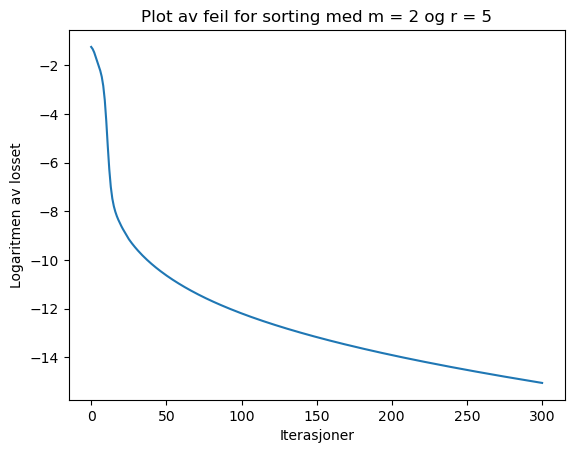

In [3]:
plt.plot(np.linspace(0,len(arr_sort_1),len(arr_sort_1)),np.log(arr_sort_1))
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil for sorting med m = 2 og r = 5')
plt.show()

#### 3.3 Sekvens $a$ med $r=7$ og $m=5$

In [4]:
#training the module
r = 7
m = 5
d = 20
k = 10
p = 25
L = 2
n_max = 2*r - 1
n_iter = 300
alpha = 0.001
num_of_samples = 250
num_train_batches = 10
num_test_batches = 1

data = get_train_test_sorting(r, m, num_of_samples, num_train_batches,num_test_batches)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1,attention2, feed_forward2, un_embed_pos, softmax]
nueralnetsortlong = NeuralNetwork(layers) #lager et nevralt nettverk for sortering med r = 7 og m = 5

x = data['x_train']
y = data['y_train']
x_t = data['x_test'][0]
y_t = data['y_test'][0]

per = accuracy_sorting(nueralnetsortlong, x_t, y_t,m, r)
print(f'prosent av antall riktige sorteringer før trening er {per*100}%')

arr_sort_2 = algorithm_4_sort(x, y, n_iter, alpha, m, nueralnetsortlong, r)

per_after = accuracy_sorting(nueralnetsortlong, x_t, y_t,m, r)
print(f'prosent av antall riktige sorteringer etter trening er {per_after*100}%')

prosent av antall riktige sorteringer før trening er 0.0%
iterasjon 30/300, gjennomsnittlig Loss: 0.10339043699910426
iterasjon 60/300, gjennomsnittlig Loss: 0.010487701465709917
iterasjon 90/300, gjennomsnittlig Loss: 0.0019940819253438423
iterasjon 120/300, gjennomsnittlig Loss: 0.0006634772715624526
iterasjon 150/300, gjennomsnittlig Loss: 0.00027375042646534054
iterasjon 180/300, gjennomsnittlig Loss: 0.00013870221284413009
iterasjon 210/300, gjennomsnittlig Loss: 7.885555347923245e-05
iterasjon 240/300, gjennomsnittlig Loss: 4.92078608967621e-05
iterasjon 270/300, gjennomsnittlig Loss: 3.25779082681366e-05
iterasjon 300/300, gjennomsnittlig Loss: 2.250875271604216e-05
prosent av antall riktige sorteringer etter trening er 100.0%


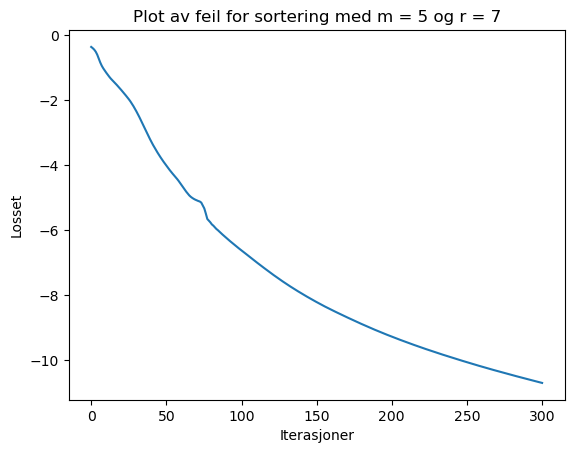

In [5]:
plt.plot(np.linspace(0,len(arr_sort_2),len(arr_sort_2)),np.log(arr_sort_2))
plt.xlabel('Iterasjoner')
plt.ylabel('Losset')
plt.title('Plot av feil for sortering med m = 5 og r = 7')
plt.show()

----
#### 3.4 - Addisjon

In [6]:
datapunkter = 150
batches = 20

d = 30
k = 20
p = 40
L = 3 #3 layers med attention og forward
m = 10
r = 2
n_max = r*3
n_iter = 150
alpha = 0.001

data_add = get_train_test_addition_2(r, datapunkter, batches)

feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
feed_forward3 = FeedForward(d,p)
attention3 = Attention(d,k)
feed_forward4 = FeedForward(d,p)
attention4 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1, feed_forward1, attention2, feed_forward2, attention3, feed_forward3, un_embed_pos, softmax]
nueralnetadd = NeuralNetwork(layers) #lager et nevralt nettverk for addisjon

x_add = data_add['x_train']
y_add = data_add['y_train']
y_add_t = data_add['y_test'][0] #tar [0] fordi det bare er en batch of funksjonen accuracy håndterer bare 2d arrays
x_add_t = data_add['x_test'][0]

per = accuracy_addition(nueralnetadd, x_add_t, y_add_t, m,r)
print(f'prosent av antall riktige addisjoner før trening er {per*100}%')

arr_add = algorithm_4_add(x_add, y_add, n_iter, alpha, m, r, nueralnetadd)

per = accuracy_addition(nueralnetadd, x_add_t, y_add_t, m,r)
print(f'prosent av antall riktige addisjoner etter trening er {per*100}%')

prosent av antall riktige addisjoner før trening er 0.0%
iterasjon 30, gjennomsnittlig Loss: 0.5824567079430206
iterasjon 60, gjennomsnittlig Loss: 0.28256868055570955
iterasjon 90, gjennomsnittlig Loss: 0.13003749712787632
iterasjon 120, gjennomsnittlig Loss: 0.08829868193270132
iterasjon 150, gjennomsnittlig Loss: 0.04553020822337511
iterasjon 180, gjennomsnittlig Loss: 0.016701506956311372
loss etter 203 iterasjoner er 0.009864276211864325
prosent av antall riktige addisjoner etter trening er 96.66666666666667%


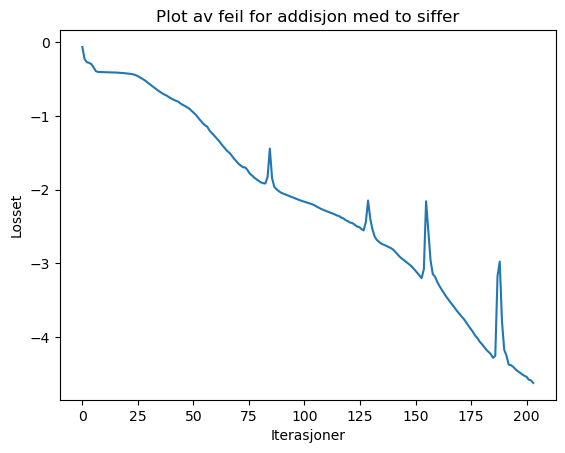

In [7]:
plt.plot(np.linspace(0,len(arr_add),len(arr_add)),np.log(arr_add))
plt.xlabel('Iterasjoner')
plt.ylabel('Losset')
plt.title('Plot av feil for addisjon med to siffer')
plt.show()

I addisjonsproblemet gitt i kapittel 3.1 blir problemet å addere to tall av et gitt antall presentert. Med lik måte å teste modellen på (utenom å reversere $\hat{y}$), var eneste endringen som måtte til for implementere samme modell som i sortering var slicing av y. Fra å ta de siste r elementene i sortering, til de siste r+1 elementene i addisjon. Dette er den mest komplekse operasjonen gjennomført av det nevrale nettverket og i tråd med dette er dimensjonene på parametermatrisene større. Algoritme 4 for addisjon er den eneste av problemstillingene hvor en while-løkke er implementert i optimaliseringsprosessen av modellen. Dette er ettersom det ikke er et gitt antall iterasjoner modellen trengte for å oppnå den ønskelige $\mathcal{L}  < 0.01$. Antall iterasjoner som krevdes var noen gang over 300, og da med 150 iterasjoner ble nøyaktighet ikke tilstrekklig. Nøyaktigheten til modellen er omtrent 100%, noe som er forventet spesielt med tanke på implementasjonen av en while-løkke. Grunnen til at det er tatt i bruk en get_train_test_addition_2 funksjon er fordi data_generators.py benyttet den første utleverte koden. Noe som fungerte optimalt for sortering men resulterte i suboptimal optimering for addisjon, derav er get_train_test_addition_2 den "corrected" versjonen som ble tatt i bruk.

---------
### Konklusjon
Gjennom de avsluttende oppgavene har det nevrale nettverket vist at gitt god treningsdata og passende startparametere kan den lære, optimalisere og predikere et output. Dette gjøres korrekt, til mye høyere grad en kan tilregne flaks, ut ifra det den har lært og inputen den har fått. Kritisk for dette var implementeringen av transformermodellen og den underliggende attention mekanismen som tillater det nevrale nettverket både å flytte informasjon og velge hvor mye som skal flyttes.<Br> Prinsipielt fungerer dette nevrale nettverket på lik måte som de store språkmodellene som ChatGPT og Gemeni. Den bruker et treningssett med data og går gjennom en optimaliseringsprosess likt som andre deep learning modeller. Objektorientert programmering har gjort denne prosessen betydelig enklere ved å tillate bruken av klasser og dermed bruken av polymorfisme funksjoner. Slik kan den underliggende koden både være raskere og enklere å implementere gjennom alle layers.  
